In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [16]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target


In [31]:
X_cancer[1]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])

In [35]:
y_cancer[1]

np.int64(0)

In [17]:
#Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

In [18]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
# Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=200)
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [20]:
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=cancer.target_names))

Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



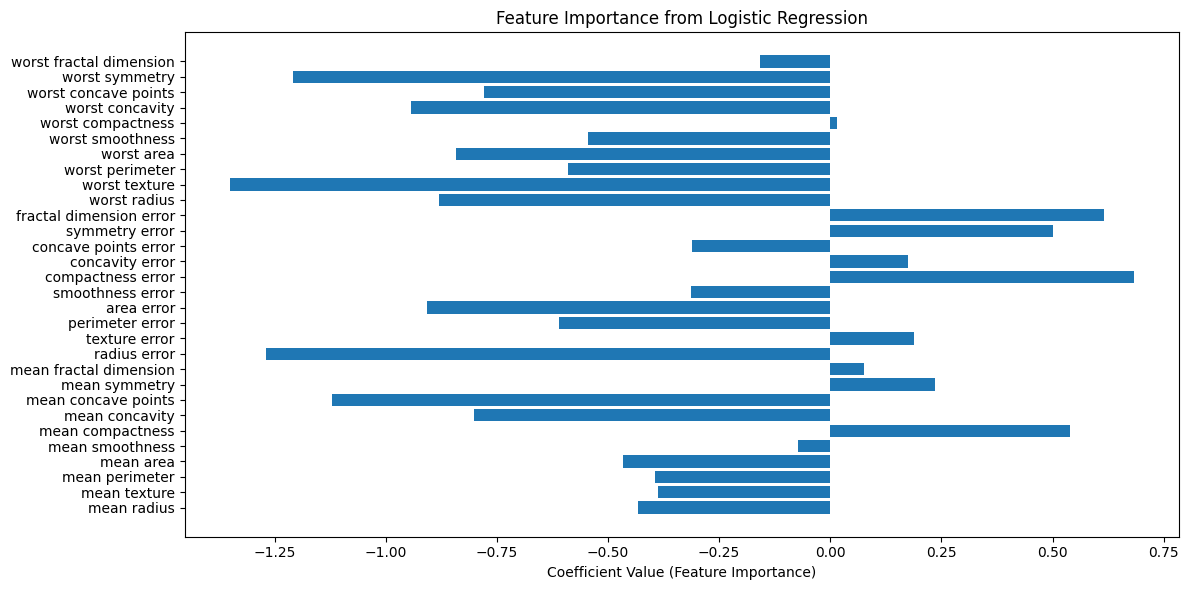

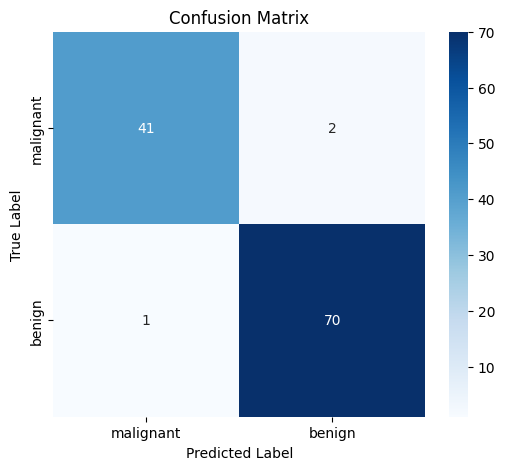

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Feature importance from logistic regression coefficients
importance = logreg.coef_[0]
features = cancer.feature_names

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(features, importance)
plt.xlabel('Coefficient Value (Feature Importance)')
plt.title('Feature Importance from Logistic Regression')
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


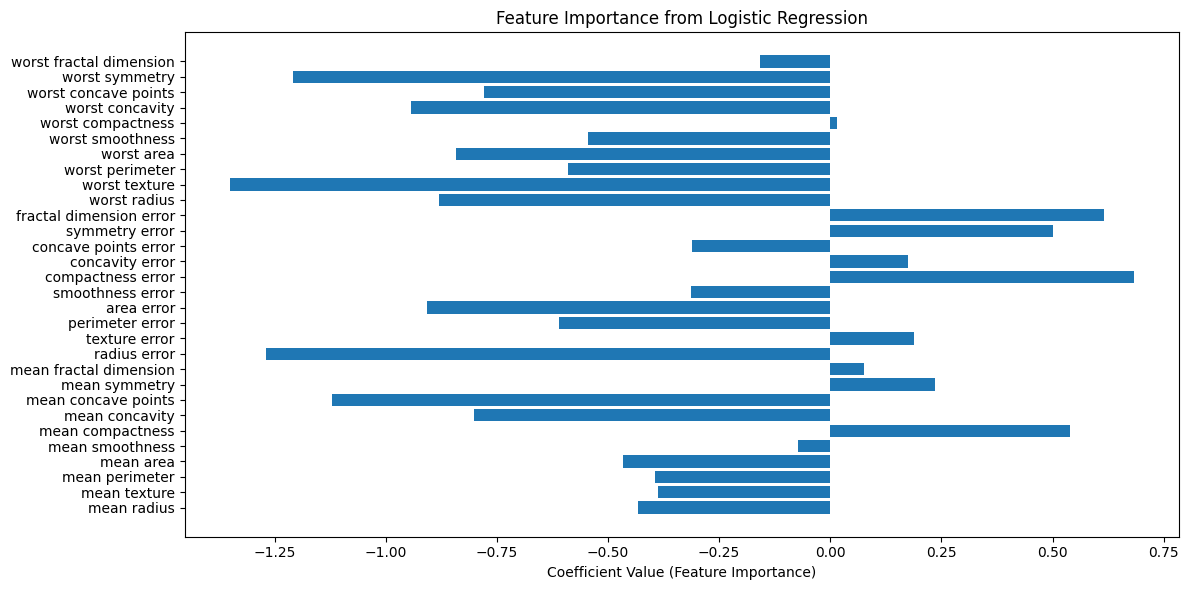

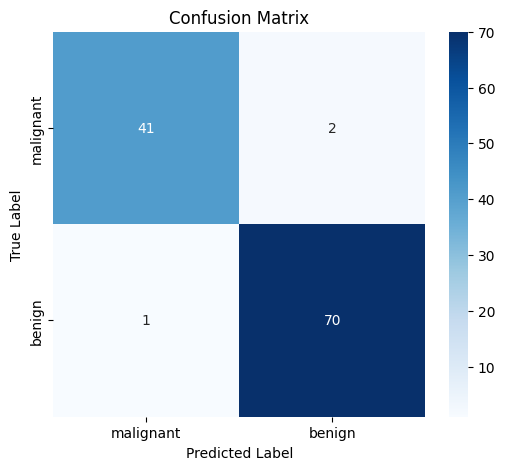

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Feature importance from logistic regression coefficients
importance = logreg.coef_.ravel()
features = cancer.feature_names

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(features, importance)
plt.xlabel('Coefficient Value (Feature Importance)')
plt.title('Feature Importance from Logistic Regression')
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [25]:
import numpy as np

# Example new input data (replace with your actual data)
# The array must have 30 values corresponding to the features in cancer.feature_names
new_data = np.array([[14.0, 20.0, 90.0, 600.0, 0.1, 0.05, 0.05, 0.02, 0.18, 0.06,
                      0.3, 1.2, 2.3, 30.0, 0.005, 0.04, 0.03, 0.01, 0.02, 0.003,
                      16.0, 25.0, 100.0, 700.0, 0.15, 0.1, 0.12, 0.04, 0.25, 0.08]])

# Scale the new data using the previously fitted scaler
new_data_scaled = scaler.transform(new_data)

# Make prediction
prediction = logreg.predict(new_data_scaled)
prediction_prob = logreg.predict_proba(new_data_scaled)

# Output results
print("Predicted class:", cancer.target_names[prediction][0])
print("Prediction probabilities:", prediction_prob)


Predicted class: benign
Prediction probabilities: [[0.0066993 0.9933007]]
